<a href="https://colab.research.google.com/github/Ayushsrinivas7/Summarizer-in-the-local-language-/blob/main/Summarizer_in_the_local_language_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

task1:

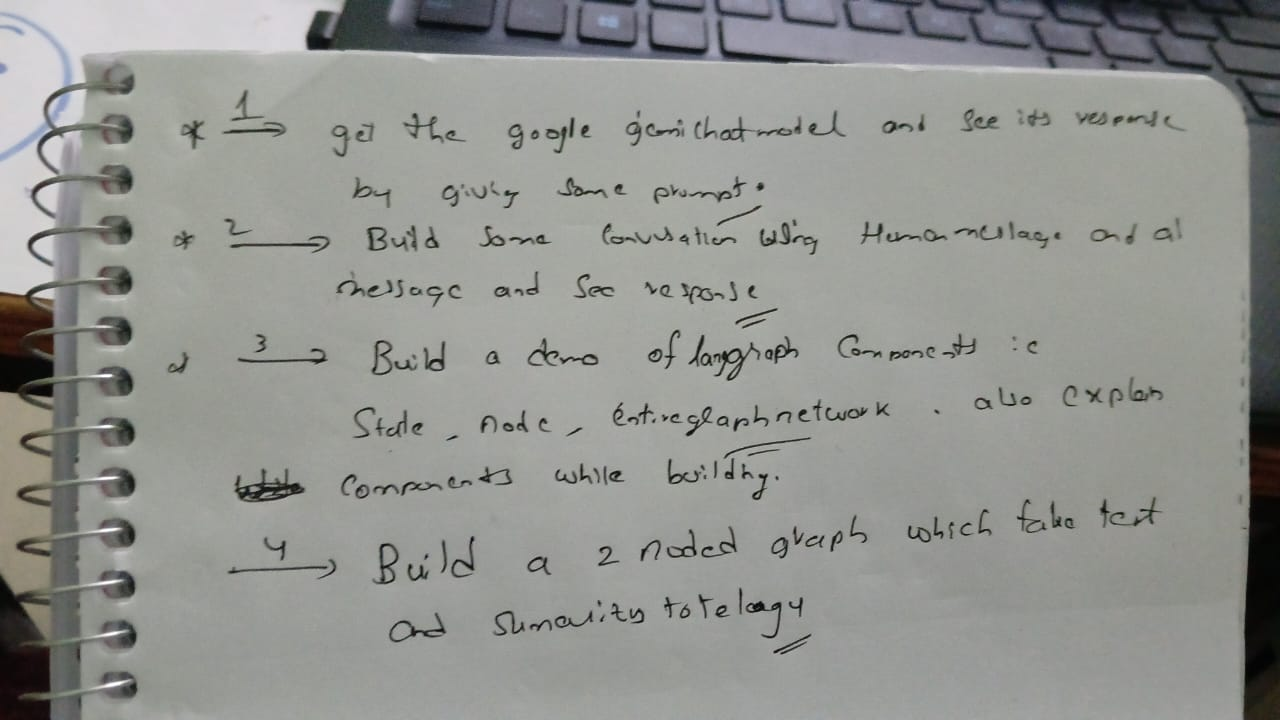

In [ ]:
!pip install langchain-google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.7 MB/s eta 0:00:00


In [ ]:
import os
from google.colab import userdata

os.environ['GOOGLE_API_KEY'] = userdata.get('GOOGLE_API_KEY')

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",
    temperature=0.4,
    timeout=None,
    max_retries=2,
    # other params...
)

In [ ]:
res = llm.invoke("hi")

In [ ]:
print(res.content)

Hi there! How can I help you today?



In [ ]:
!pip install -q langchain_core

In [ ]:
from langchain_core.messages import HumanMessage , AIMessage
messages = [
    HumanMessage( content = "hi"  , name = "myself") , AIMessage( content = "Hi there! How can I help you today?"  , name = "AI Assistant"),
    HumanMessage( content = "i want to learn some thing "  , name = "myself") , AIMessage( content = "waht do you want to learn tell me iwill give the entire roapmap and resourses to learn "  , nmae = "AI Assistant "),
    HumanMessage( content = "i want to learn langgraph please help me" , name = "myself")
]

In [ ]:
response = llm.invoke(messages)
print(response.content)

LangChain is a powerful framework, but "learning LangChain" is a broad goal.  To help me give you the best roadmap, let's break it down.  To effectively learn LangChain, we need to consider your existing skills and your desired outcome.  Please tell me:

* **What is your current programming experience?** (e.g., beginner, intermediate, advanced in Python, other languages)  LangChain primarily uses Python.
* **What is your familiarity with Large Language Models (LLMs)?** (e.g., never used one, used them a little, understand the concepts well)  Understanding LLMs is crucial for using LangChain effectively.
* **What do you want to *do* with LangChain?**  This is the most important question.  Do you want to:
    * Build a chatbot?
    * Create a question-answering system?
    * Summarize documents?
    * Build a custom LLM application?  (If so, what kind?)
    * Something else entirely?

Once I have this information, I can provide a tailored learning path with resources and examples.  The m

In [ ]:
response = llm.invoke(f"please  translate the following text to telugu : how are you")
print(response.content)


The most common and versatile way to say "How are you?" in Telugu is:

**ఎలా ఉన్నారు? (elā unnāru?)**

This is the polite form, used for elders and people you don't know well.

For friends and people you know well, you can use:

**ఎలా ఉన్నావు? (elā unnāvu?)** (masculine)
**ఎలా ఉన్నావ్? (elā unnāv?)** (feminine)


The choice depends on your relationship with the person and their gender.



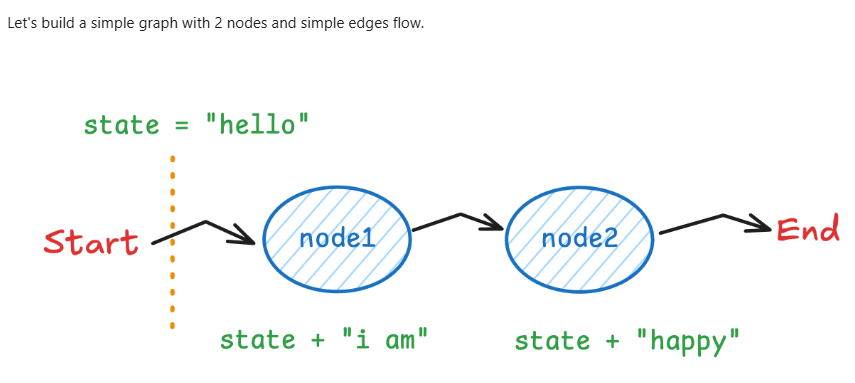

In [ ]:
!pip install -q langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.3 MB/s eta 0:00:00


** state : here state is nothing but the schema .<br>
using the typed dict we define the state just like we define the schema in the database
<br>
**

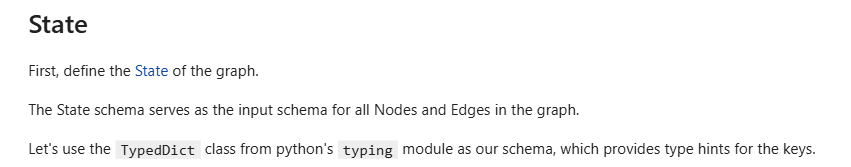

In [ ]:
from typing_extensions import TypedDict

# using this class -> claasname -> typed dict as parent -> we define the schema

class LearningState(TypedDict):

  prompt : str
  # var name and type




In [ ]:
s1 = LearningState( prompt = "hi")

In [ ]:
print(s1)
print(s1['prompt'])
print(type(s1))

{'prompt': 'hi'}
hi
<class 'dict'>


** <center> hey node is nothing but a python function whose input is this state object
</center>
<br>
node is the place where we write some fucntions and do the tasks and then update the state with the results and return this state **
<br> node can acess the keys of the state
<br>

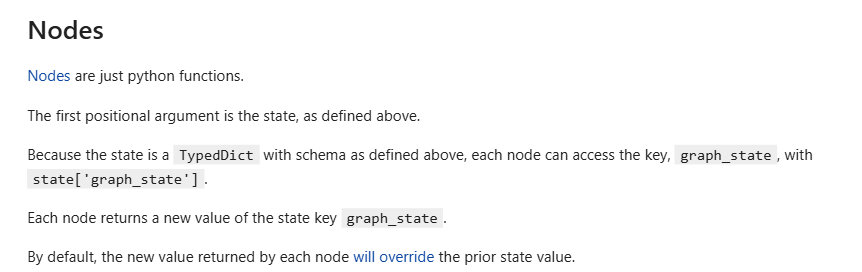

In [ ]:
def node1(state : LearningState):
  print(f" ------ present state is  {state} ")
  return {"prompt"  : state["prompt"] + "I am" }
# note in the node you have to return state


In [ ]:
def node2( state : LearningState):
  print(f" ------ present state is  {state} ")
  return {"prompt"  : state["prompt"] + " ayush7" }


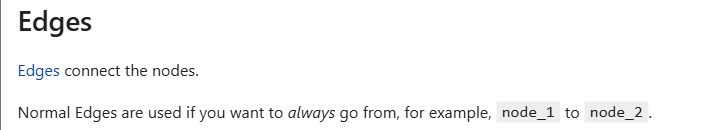

<center> ** idea is simple define the individual nodes as your wish , schema as your wish and then finnaly connect the nodes and form the graph ** </center>

** forbuilding the graph we follw the steps :
<br>
1) first intialize the stategraph class with the schema ie state <br>
2) then add the all nodes that we created <br>
3) we use the start node and end node are special nodes using which we send input and output respectively <br>
4) now complie the graph <br>
5) we vizualize the graph using the mermid diagram **


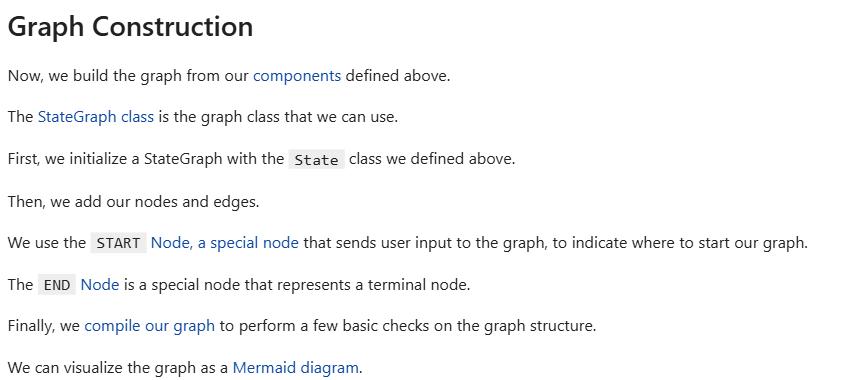

In [ ]:
import langgraph
from langgraph.graph import StateGraph ,  START , END
from langgraph.graph.state import CompiledStateGraph


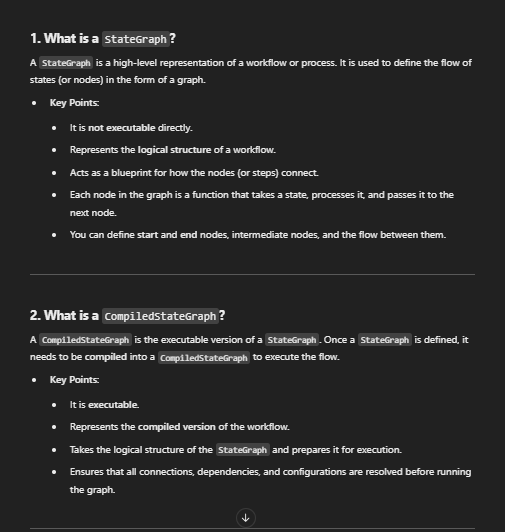

Now build the graph

In [ ]:
builder = StateGraph( state_schema = LearningState )
print(type(builder))

<class 'langgraph.graph.state.StateGraph'>


In [ ]:
builder.add_node("node1" , node1)
builder.add_node("node2" , node2)


In [ ]:
builder.add_edge(START , "node1")
builder.add_edge("node1" , "node2" )
builder.add_edge("node2" , END)


In [ ]:
graph = builder.compile()
print(type(graph))

<class 'langgraph.graph.state.CompiledStateGraph'>


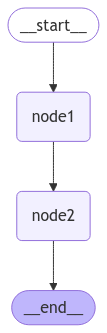

In [ ]:
from IPython.display import Image, display # Preview Graph
# we first get the graph via graph.get_graph()
# then we use the .draw_mermaid_png()
# we then covert it to image via Image
# and then use the display to display
display(Image(graph.get_graph().draw_mermaid_png()))

** By now we have made the graph and complied the graph now ready to use **

for graph we give input via .invoke which is like a standard way of giving prompt

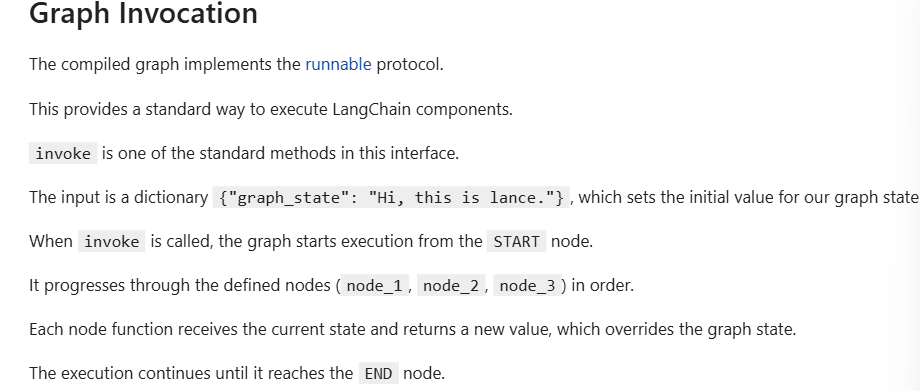

In [ ]:
response = graph.invoke({"prompt" : "hi"})
print(response)
print(type(response))
print(response["prompt"])

 ------ present state is  {'prompt': 'hi'} 
 ------ present state is  {'prompt': 'hiI am'} 
{'prompt': 'hiI am ayush7'}
<class 'langgraph.pregel.io.AddableValuesDict'>
hiI am ayush7


<h1>  task is to make a grpah agent of 3 nodes where 1st node  will take the entire text and summerise it node 2 translate the it into hindi and then node 3 will take the summeraized input and eloberate it in such a way that even 10 th class guy can understand  </h1>

In [ ]:
class Schema(TypedDict):
  messages : list


In [ ]:
from langchain_core.messages import HumanMessage , AIMessage
messages = [
    HumanMessage(content = 'hi' , name = 'myself'),
    AIMessage(content = 'hi how can i help you ' , name = 'AI assistant')
]
s1 = Schema(messages = messages )


In [ ]:
print(s1)
print(s1['messages'])

{'messages': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}, name='myself'), AIMessage(content='hi how can i help you ', additional_kwargs={}, response_metadata={}, name='AI assistant')]}
[HumanMessage(content='hi', additional_kwargs={}, response_metadata={}, name='myself'), AIMessage(content='hi how can i help you ', additional_kwargs={}, response_metadata={}, name='AI assistant')]


In [ ]:
def node1(state):
  messages = [
    HumanMessage(content = 'hi' , name = 'myself'),
    AIMessage(content = 'hi how can i help you ' , name = 'AI assistant')
    ]
  text = state["messages"][-1]
  m1 = HumanMessage(content = f" please the  summarise the following text : {text}"  , name = 'myself')
  messages.append(m1)
  response = llm.invoke(messages)
  result = response.content
  print(result)
  m2 = AIMessage(content = f"{result}"  , name = 'AI assitant')
  messages.append(m2)
  state['messages'] = messages
  return state


In [ ]:
text = """Artificial intelligence (AI) is a field of science that focuses on creating machines that can learn, reason, and act in ways that would usually require human intelligence. AI systems use algorithms, data, and computational power to simulate human intelligence. They can learn from experience, adjust to new inputs, and perform tasks that are typically human-like.
AI is used in a wide range of fields, including:
Business: AI is used for data analytics, predictions, forecasting, object categorization, natural language processing, and recommendations.
Consumer electronics: AI is used in smartphones, smart home devices, and personal assistants for features like predictive typing, enhanced photography, and language translation.
Healthcare: AI is used in hospital equipment.
Politics: AI is used in politics.
AI systems learn and improve by analyzing large amounts of data to identify patterns and relationships. They can adapt their behavior by analyzing the effects of their previous actions.
Some types of AI include:
Reactive machines: These are the most basic type of AI and can only perform certain tasks within a narrow scope. For example, they can play chess but can't perform tasks outside of that context.
Bayesian networks: These can be used for reasoning, learning, planning, and perception.
Probabilistic algorithms: These can be used for filtering, prediction, smoothing, and finding explanations for streams of data. """
s1 = Schema(messages = [text])


In [ ]:
node1(s1)['messages'][-1].content

Artificial intelligence (AI) uses algorithms and data to create machines that mimic human intelligence.  AI applications are widespread, impacting business, consumer electronics, healthcare, and politics.  AI systems vary in complexity, from simple reactive machines to sophisticated systems using probabilistic algorithms for advanced tasks like prediction and analysis.  All AI systems learn and improve by analyzing data to identify patterns.



'Artificial intelligence (AI) uses algorithms and data to create machines that mimic human intelligence.  AI applications are widespread, impacting business, consumer electronics, healthcare, and politics.  AI systems vary in complexity, from simple reactive machines to sophisticated systems using probabilistic algorithms for advanced tasks like prediction and analysis.  All AI systems learn and improve by analyzing data to identify patterns.\n'

In [ ]:
def node2(state):
  t1 = state['messages'][-1].content
  m1 = HumanMessage(content= f"please translate this message into telugu : {t1}"  , name = 'myself')
  state['messages'].append(m1)
  response = llm.invoke(state['messages'])
  result = response.content
  print(result)
  m1 = AIMessage(content= result  , name = 'AI assistant')
  state['messages'].append(m1)
  return state



In [ ]:
s1 = Schema(messages = [text])
s2 = node1(s1)
s3 = node2(s2)

Artificial intelligence (AI) uses algorithms and data to mimic human intelligence, enabling machines to learn, reason, and act.  Its applications span numerous fields, including business (data analysis, predictions), consumer electronics (smart devices, personal assistants), healthcare (hospital equipment), and politics.  AI systems learn from data, adapting their behavior based on past actions.  Types of AI range from simple reactive machines (limited to specific tasks) to more complex systems like Bayesian networks and probabilistic algorithms used for reasoning, prediction, and data analysis.

కృత్రిమ మేధ (AI) అల్గోరిథమ్‌లు మరియు డేటాను ఉపయోగించి మానవ మేధస్సును అనుకరించడం ద్వారా యంత్రాలు నేర్చుకోవడం, తార్కికం చేయడం మరియు పనిచేయడం సాధ్యపడుతుంది. దీని అనువర్తనాలు వ్యాపారం (డేటా విశ్లేషణ, అంచనాలు), వినియోగదారు ఎలక్ట్రానిక్స్ (స్మార్ట్ పరికరాలు, వ్యక్తిగత సహాయకులు), ఆరోగ్య సంరక్షణ (ఆసుపత్రి పరికరాలు) మరియు రాజకీయాలు వంటి అనేక రంగాలలో విస్తరించి ఉన్నాయి. AI వ్యవస్థలు డేటా నుండి నేర్చుకుం

In [ ]:
s3['messages'][-1].content

'కృత్రిమ మేధ (AI) అల్గోరిథమ్\u200cలు మరియు డేటాను ఉపయోగించి మానవ మేధస్సును అనుకరించడం ద్వారా యంత్రాలు నేర్చుకోవడం, తార్కికం చేయడం మరియు పనిచేయడం సాధ్యపడుతుంది. దీని అనువర్తనాలు వ్యాపారం (డేటా విశ్లేషణ, అంచనాలు), వినియోగదారు ఎలక్ట్రానిక్స్ (స్మార్ట్ పరికరాలు, వ్యక్తిగత సహాయకులు), ఆరోగ్య సంరక్షణ (ఆసుపత్రి పరికరాలు) మరియు రాజకీయాలు వంటి అనేక రంగాలలో విస్తరించి ఉన్నాయి. AI వ్యవస్థలు డేటా నుండి నేర్చుకుంటాయి, గత చర్యల ప్రభావాలను విశ్లేషించడం ద్వారా వాటి ప్రవర్తనను అనుగుణంగా మార్చుకుంటాయి. AI రకాలు సరళమైన ప్రతిస్పందన యంత్రాల నుండి (నిర్దిష్ట పనులకు మాత్రమే పరిమితం) బేసియన్ నెట్\u200cవర్క్\u200cలు మరియు సంభావ్యత అల్గోరిథమ్\u200cలు వంటి సంక్లిష్ట వ్యవస్థల వరకు ఉంటాయి, ఇవి తార్కికం, అంచనా మరియు డేటా విశ్లేషణకు ఉపయోగించబడతాయి.\n'

In [ ]:
from langgraph.graph.state import StateGraph , START , END
from langgraph.graph.state import CompiledStateGraph

builder = StateGraph(state_schema = Schema)


In [ ]:
builder.add_node("summarizer" , node1)
builder.add_node("translator" , node2)
builder.add_edge(START , "summarizer")
builder.add_edge( "summarizer"  , "translator" )
builder.add_edge( "translator" , END )



In [ ]:
graph = builder.compile()

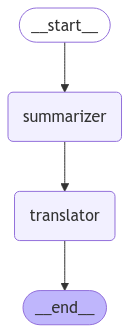

In [ ]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
result = graph.invoke({'messages' : [text] })

Artificial intelligence (AI) uses algorithms and data to mimic human intelligence, enabling machines to learn, reason, and act.  It's applied across various sectors, including business (data analysis, predictions), consumer electronics (smart devices), healthcare (hospital equipment), and politics.  AI systems learn from data, adapting their behavior based on past actions.  Types of AI range from simple reactive machines (e.g., chess-playing programs) to more complex systems using Bayesian networks and probabilistic algorithms for tasks like reasoning and data analysis.

కృత్రిమ మేధ (AI) అల్గోరిథమ్‌లు మరియు డేటాను ఉపయోగించి మానవ మేధస్సును అనుకరించడం ద్వారా యంత్రాలు నేర్చుకోవడం, తర్కించడం మరియు పనిచేయడం సాధ్యపడుతుంది.  ఇది వ్యాపారం (డేటా విశ్లేషణ, అంచనాలు), వినియోగదారు ఎలక్ట్రానిక్స్ (స్మార్ట్ పరికరాలు), ఆరోగ్య సంరక్షణ (ఆసుపత్రి పరికరాలు) మరియు రాజకీయాలు వంటి వివిధ రంగాలలో వర్తించబడుతుంది. AI వ్యవస్థలు డేటా నుండి నేర్చుకుంటాయి, గత చర్యల ఆధారంగా వాటి ప్రవర్తనను మార్చుకుంటాయి. AI రకాలు సా

In [ ]:
print(result['messages'][-1].content)

కృత్రిమ మేధ (AI) అల్గోరిథమ్‌లు మరియు డేటాను ఉపయోగించి మానవ మేధస్సును అనుకరించడం ద్వారా యంత్రాలు నేర్చుకోవడం, తర్కించడం మరియు పనిచేయడం సాధ్యపడుతుంది.  ఇది వ్యాపారం (డేటా విశ్లేషణ, అంచనాలు), వినియోగదారు ఎలక్ట్రానిక్స్ (స్మార్ట్ పరికరాలు), ఆరోగ్య సంరక్షణ (ఆసుపత్రి పరికరాలు) మరియు రాజకీయాలు వంటి వివిధ రంగాలలో వర్తించబడుతుంది. AI వ్యవస్థలు డేటా నుండి నేర్చుకుంటాయి, గత చర్యల ఆధారంగా వాటి ప్రవర్తనను మార్చుకుంటాయి. AI రకాలు సాధారణ ప్రతిస్పందన యంత్రాల నుండి (ఉదాహరణకు, చెస్ ఆడే కార్యక్రమాలు) తర్కం మరియు డేటా విశ్లేషణ వంటి పనులకు బేసియన్ నెట్‌వర్క్‌లు మరియు సంభావ్యత అల్గోరిథమ్‌లను ఉపయోగించే సంక్లిష్ట వ్యవస్థల వరకు ఉంటాయి.



In [ ]:
text1 = """
Jimson Mathew (Senior Member, IEEE) received the master’s degree in computer engineering from Nanyang Technological University (NTU), Singapore, and the Ph.D. degree in computer engineering from the University of Bristol, Bristol, U.K. Throughout his career, he has held positions at various prestigious institutions, including the Centre for Wireless Communications, National University of Singapore; Bell Laboratories Research, Lucent Technologies North Ryde, Australia; the Royal Institute of Technology KTH, Stockholm, Sweden; and the Department of Computer Science, University of Bristol. He was the Head of the Department of Computer Science and Engineering, Indian Institute of Technology Patna (IIT Patna), India. He is currently a Professor with the Department of Computer Science and Engineering, IIT Patna. He has made significant contributions to the field of computer engineering and has a strong academic portfolio. He holds multiple patents, has coauthored three books, and has published over 100 papers in renowned international journals and conferences. His research interests include fault-tolerant computing, hardware security, large-scale integration design, and design automation. His expertise and contributions have had a notable impact on computer engineering. He is a member of The Institution of Engineering and Technology (IET).(Based on document published on 21 February 2024).
"""
result = graph.invoke({'messages' : [text1]} )

Jimson Mathew is a Professor of Computer Science and Engineering at IIT Patna, India.  He holds a Master's degree from NTU Singapore and a PhD from the University of Bristol.  His career includes positions at prestigious institutions worldwide.  He's published over 100 papers, co-authored three books, holds multiple patents, and his research focuses on fault-tolerant computing, hardware security, and design automation.

జిమ్సన్ మాథ్యూ ఇండియాలోని IIT పాట్నాలో కంప్యూటర్ సైన్స్ అండ్ ఇంజినీరింగ్ ప్రొఫెసర్.  ఆయన సింగపూర్ లోని NTU నుండి మాస్టర్స్ డిగ్రీని మరియు బ్రిస్టల్ విశ్వవిద్యాలయం నుండి పిహెచ్డీని పొందారు.  ఆయన కెరీర్ ప్రపంచవ్యాప్తంగా ఉన్న ప్రతిష్టాత్మక సంస్థలలో పదవులను కలిగి ఉంది.  ఆయన 100 కంటే ఎక్కువ పేపర్లు ప్రచురించారు, మూడు పుస్తకాలను సహ రచించారు, అనేక పేటెంట్లను కలిగి ఉన్నారు, మరియు ఆయన పరిశోధన లోపాలను తట్టుకునే కంప్యూటింగ్, హార్డ్వేర్ భద్రత మరియు డిజైన్ ఆటోమేషన్లపై దృష్టి పెడుతుంది.



In [ ]:
print(result['messages'][-1].content)


జిమ్సన్ మాథ్యూ ఇండియాలోని IIT పాట్నాలో కంప్యూటర్ సైన్స్ అండ్ ఇంజినీరింగ్ ప్రొఫెసర్.  ఆయన సింగపూర్ లోని NTU నుండి మాస్టర్స్ డిగ్రీని మరియు బ్రిస్టల్ విశ్వవిద్యాలయం నుండి పిహెచ్డీని పొందారు.  ఆయన కెరీర్ ప్రపంచవ్యాప్తంగా ఉన్న ప్రతిష్టాత్మక సంస్థలలో పదవులను కలిగి ఉంది.  ఆయన 100 కంటే ఎక్కువ పేపర్లు ప్రచురించారు, మూడు పుస్తకాలను సహ రచించారు, అనేక పేటెంట్లను కలిగి ఉన్నారు, మరియు ఆయన పరిశోధన లోపాలను తట్టుకునే కంప్యూటింగ్, హార్డ్వేర్ భద్రత మరియు డిజైన్ ఆటోమేషన్లపై దృష్టి పెడుతుంది.

